In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt

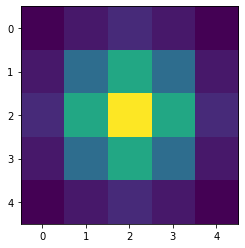

In [8]:
def get_gauss_kernel(size=3,sigma=1):
    center=(int)(size/2)
    kernel=np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            diff=np.sqrt((i-center)**2+(j-center)**2)
            kernel[i,j]=np.exp(-(diff**2)/(2*sigma**2))
    return kernel/np.sum(kernel)

plt.imshow(get_gauss_kernel(5,1));

In [9]:
import numpy as np

def gkern(l=5, sig=1.):
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)


print(gkern(l=5, sig=1.))
print(get_gauss_kernel(5,1))

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]
[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


In [11]:
np.allclose(gkern(l=5, sig=1.), get_gauss_kernel(5,1))

True

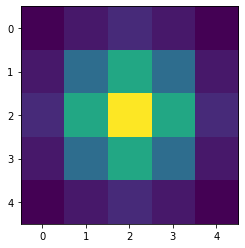

In [14]:
def gaussian_kernel(size=3, sigma=1):
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel / np.sum(kernel)

plt.imshow(gkern(5,1));

In [28]:
def gaussian_kernel(size=3, sigma=1):
    ax = torch.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = torch.meshgrid(ax, ax)
    kernel = torch.exp(torch.tensor(-0.5) * (torch.square(xx) + torch.square(yy)) / torch.square(sigma))
    return kernel / torch.sum(kernel)

plt.imshow(gaussian_kernel(5,1));

TypeError: square(): argument 'input' (position 1) must be Tensor, not int

In [37]:
import numpy as np
import torch.nn as nn

class GaussianBlurConv(nn.Module):
    def __init__(self, channels=3, size=3, sigma=1):
        super(GaussianBlurConv, self).__init__()
        self.channels = channels
        kernel = self.gaussian_kernel(size, sigma)
        kernel = torch.FloatTensor(kernel).unsqueeze(0).unsqueeze(0)
        kernel = np.repeat(kernel, self.channels, axis=0)
        self.weight = nn.Parameter(data=kernel, requires_grad=False)
 
    
    def __call__(self, x):
        x = F.conv2d(x.unsqueeze(0), self.weight, padding=2, groups=self.channels)
        return x



def gaussian_kernel(l=5, sig=1.):
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    kernel = torch.tensor(kernel / np.sum(kernel)).float()
    return kernel[None][None].expand(3, 3, -1, -1)

def gaussian_conv2d(kernel_size, sigma, padding=1):
    conv = nn.Conv2d(3, 3, kernel_size, padding=padding)
    conv.weight.data = gaussian_kernel(kernel_size, sigma)
    return conv




kernel =torch.tensor(gkern(3, 1))[None][None].expand(3, 3, -1, -1)
print(kernel.shape)
conv = nn.Conv2d(1, 1, 3)
conv

torch.Size([3, 3, 3, 3])


Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

In [32]:
conv.weight.data.shape

torch.Size([1, 1, 3, 3])

In [29]:
size=3 
sigma=1
ax = torch.linspace(-(size - 1) / 2., (size - 1) / 2., size)
xx, yy = torch.meshgrid(ax, ax)
kernel = torch.exp(-0.5 * (torch.square(xx) + torch.square(yy)) / torch.square(sigma))
kernel / torch.sum(kernel)

TypeError: square(): argument 'input' (position 1) must be Tensor, not int

In [38]:
def gaussian_kernel(l=5, sig=1.):
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    kernel = torch.tensor(kernel / np.sum(kernel)).float()
    return kernel[None][None].expand(3, 3, -1, -1)

def gaussian_conv2d(kernel_size, sigma, padding=1):
    conv = nn.Conv2d(3, 3, kernel_size, padding=padding)
    conv.weight.data = gaussian_kernel(kernel_size, sigma)
    return conv

conv = gaussian_conv2d(3, 1)
conv

Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [39]:
conv(torch.rand(5, 3, 64, 64)).shape

torch.Size([5, 3, 64, 64])